In [1]:
# current date, for retrieving data from proper location.
year = "2023"
month = "May"
day = "30"

## Imports and initialization

In [2]:
%config Completer.use_jedi = False
import numpy as np 
from scipy.optimize import minimize
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
import scipy.signal
import matplotlib.ticker as ticker
from matplotlib import gridspec
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
from scipy.optimize import curve_fit
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle
import scipy.constants as const
from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import scipy.constants as const
from arc import *
import random
# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
plt.rcParams["axes.linewidth"] = 1.5
color1 = 'tab:green'
color2 = 'tab:blue'
markersize = 10
capsize = 5
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon
from scipy.signal import savgol_filter
from scipy.optimize import fmin
from scipy.optimize import brentq
from scipy import optimize
from scipy.interpolate import interp1d
import sympy as sp

In [9]:
import scipy.constants as const
from arc import *
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import optimize
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy.optimize import fmin
from scipy.optimize import brentq
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CollisionalAnalysis as lac
# import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

In [4]:
reloadMyModules(30)

In [5]:
atomlocs = [2, 2, 3, 3, 1]

In [6]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])
# 
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

## test data for decay constant and $\alpha$ fit

The function "beta_fit_guess" fits the "load two" data with a decaying exponential and returns the decay constant $\tau^{-1}$, which is then used in the beta prime simulation to idenitify the minimum  range of the brute force fitting. The "beta_fit_guess" function also fits the "load one" experimental data to a one-body survival probability function $P_1(t)=1-\left(1+\eta(t)+\frac{1}{2} \eta(t)^2\right) \exp (-\eta(t))$ to find the one-body heating rate $\alpha$, which is then passed to the beta prime simulation to find the single-atom loss rate $\gamma(t)=-\dot P(t)/P(t)$

TypeError: beta_fit_guess() got multiple values for argument 'alpha_guess'

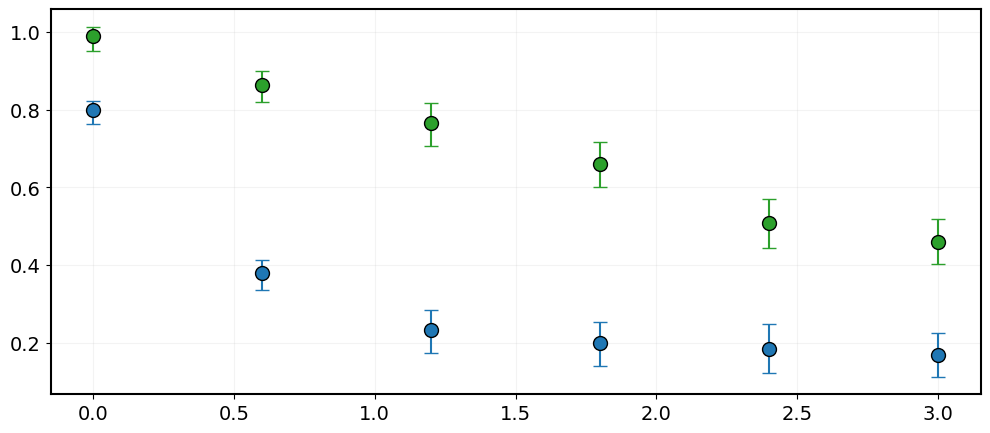

In [10]:
##pulse duration
reloadMyModules(20,'november')
fileId = 32 
threshold = 75
x_data,load_one_y,load_one_err,load_two_y,load_two_err, unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_one_y[0] = .99
load_two_y[0] = 0.8
load_two_y[3] = 0.2

fig, ax = plt.subplots(figsize=(12, 5))

ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)

alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y,load_one_err, 1e-3, 30e-6,alpha_guess=125e-6,num_points = 75,plot=True)

ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta(2 \rightarrow 0) = 100 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $');

In [119]:
tau,x_fit,y_fit,y_fit_unc = ca.decay_fit(x_data,load_two_y,num_points = 50,plot=False)

# Light assisted two body loss rate

We want to calculate the two-body loss rate $\beta = \beta^{\prime}2 \sqrt{2}V$ where $V=\left(\frac{2 \pi k_b T}{m\left(\omega_r^2 \omega_a\right)^{2 / 3}}\right)^{3 / 2}$ is the trap volume

In [10]:
def trap_volume(T0, omega_ax, omega_rad, mass=87*const.u):
    """
    T0 initial temperature in K
    omega_ax (rad) axial (radial) trap fequencies
    return in m^3
    """
    omega = (omega_ax * omega_rad**2)**(1/3)
    return (2*np.pi*const.k*T0/ (mass* omega**2))**(3/2)

def calc_beta(beta_prime,V):
    """
    beta_prime is the fitted two-body loss decay rate. 
    V trap volume
    return in SI units m^3/s
    """
    return beta_prime * 2* np.sqrt(2) * V

## Monte-Carlo simulation

To find $\beta^{\prime}$, we need to compute the infintesimal probabilities for two-body and one-body loss events between times $t$ and $t + dt$, and fit the resulting probabilites to the data. 

$d q_{\text {two-body }}=\beta^{\prime} N(t)[N(t)-1] d t / 2$ 

$d q_{\text {one-body }}=\gamma(t) N(t) d t$

$\gamma(t) = - \dot P_1(t)/P_1(t)$ is the one-body loss rate, where $P_1(t)$ is the probability that a single atom remains in the trap:

$P_1(t)=1-\left(1+\eta(t)+\frac{1}{2} \eta(t)^2\right) \exp (-\eta(t))$  (assuming a harmonic trap and a Boltzmann energy distribution) 

Here, $ \eta(t) = \frac{U}{T_0+\alpha}$ where $T_0$ is the initial atom temperaturem and $\alpha$ is is the single-atom heating rate 

In [72]:
def dq_two_body(beta_prime, N, dt):
    return beta_prime * N*(N-1)*dt/2

def dq_one_body(gamma, N, dt):
    return gamma * N *dt

def P1(t,U, T0, alpha):
    """ Survival probability of an atom due to heating. Assuming a harmonic trap and a Boltzmann energy distribution
    U: trap depth in J
    T0 initial temperature
    alpha: heating rate"""
    return 1- np.exp(- U/(T0 + alpha*t) ) * ( 1+ U/(T0 + alpha*t) + U**2/(2*(T0 + alpha*t)**2) )

def gamma(t,U, T0, alpha):
    P1 = 1- np.exp(- U/(T0 + alpha*t) ) * ( 1+ U/(T0 + alpha*t) + U**2/(2*(T0 + alpha*t)**2) )
    P1dot_term1 = -np.exp(-U / (alpha * t + T0)) * (-alpha * U / (alpha * t + T0)**2 - alpha * U**2 / (alpha * t + T0)**3)
    P1dot_term2 = -(alpha * np.exp(-U / (alpha * t + T0)) * U * (1 + U / (alpha * t + T0) + U**2 / (2 * (alpha * t + T0)**2))) / (alpha * t + T0)**2
    P1_dot = P1dot_term1 + P1dot_term2
    return float(-P1_dot/P1  )


def number_of_lost_atoms(key_name):
    if key_name == 'no_loss':
            return 0 # no loss
    elif key_name== 'one_loss':
            return 1 # one loss
    elif key_name== 'two_loss':
            return 2 # two loss

In [73]:
gamma(1,1e-3,30e-6,10e-4)

2.2427624285868895

## Define beta' function

In [227]:
def two_body_loss_sim(ts, beta_prime,alpha, U=1e-3,T0=30e-6, start = 0.85, asymp = 0.2):
    trajectories = 500
    dt_step = ts[1] - ts[0]
    surv_sum_traj = np.zeros(len(ts))

    for j in np.arange(trajectories):
        surv_dts = np.zeros(len(ts)) 
        surv_dts[0] = 2    # Initial number of atoms = 2
        for i in range(len(ts)):
            # print("\033[1m trajectory # \033[0m",j,"\033[1m time step # \033[0m",i)
            if i == 0:
                num_atoms_at_this_step = surv_dts[0]  # fixes inital atom number at N=2
            else:
                num_atoms_at_this_step = surv_dts[i - 1] # selects matrix elemenet
            P_two_body_loss = dq_two_body(beta_prime, num_atoms_at_this_step, dt_step)
            P_one_body_loss = dq_one_body(gamma(dt_step,U,T0,alpha), num_atoms_at_this_step, dt_step)
            prob_no_loss = (1 - P_one_body_loss) * (1 - P_two_body_loss)
            prob_one_loss = P_one_body_loss * (1 - P_two_body_loss)
            prob_two_loss = (1 - P_one_body_loss) * P_two_body_loss

            prob_dict = {'no_loss': prob_no_loss, 'one_loss': prob_one_loss, 'two_loss': prob_two_loss}
            
            # Define a probability order (smallest prob to largest prob)
            ordered_dict = sorted(prob_dict.items(), key=lambda x: x[1]) 
            
            # Choose which decay channel will happen using Monte Carlo
            p_rand = random.random() # random number between 0 and 1
            p_rand_20_21 = random.random()
            # print('p_rand=',p_rand)
            # print('probabilites=',ordered_dict)
            if p_rand < ordered_dict[0][1]: # if random number is less than the smallest loss probability of the three loss options
                if surv_dts[i] == 2 and p_rand_20_21 < asymp:
                    surv_dts[i] -= 1
                else: 
                    surv_dts[i] = num_atoms_at_this_step - number_of_lost_atoms(ordered_dict[0][0]) # then the # of remaining atoms at this time step is determined by key name of smallest survival probability
                # print('key, atoms lost=',ordered_dict[0][0],',',number_of_lost_atoms(ordered_dict[0][0]))
                # print('remaining atoms at this time=',surv_dts[i])
            elif ordered_dict[0][1] < p_rand < ordered_dict[1][1]: # if random number is between smallest loss and second smallest loss probability 
                if surv_dts[i] == 2 and p_rand_20_21 < asymp:
                    surv_dts[i] -= 1  
                else:
                    surv_dts[i] = num_atoms_at_this_step - number_of_lost_atoms(ordered_dict[1][0])
                # print('key, atoms lost=',ordered_dict[1][0],',',number_of_lost_atoms(ordered_dict[1][0]))
                # print('remaining atoms at this time=',surv_dts[i])
            else: # if random number is greater than both of the 2 smallest probabilities
                if surv_dts[i] == 2 and p_rand_20_21 < asymp:
                    surv_dts[i] -= 1                
                else:
                    surv_dts[i] = num_atoms_at_this_step - number_of_lost_atoms(ordered_dict[2][0]) # the # of atoms remaining = inital atom # - value for the key with the largest probability
                # print('key, atoms lost=',ordered_dict[2][0],',',number_of_lost_atoms(ordered_dict[2][0]))
                # print('remaining atoms at this time=',surv_dts[i])
                
        # apply a 2->1 collision (80% probability 2-1) and image (10% prob of 2-1)
        for k in range(len(surv_dts)):
            p_rand_LAC_21 = random.random()
            p_rand_image_21 = random.random()
            if surv_dts[k] == 2 and p_rand_LAC_21 <= start: #2-1 pulse
                surv_dts[k] -= 1   
            if surv_dts[k] == 2 and p_rand_image_21 <= 0.1: #imaging pulse
                surv_dts[k] -= 1            
            if surv_dts[k] == 2:         
                surv_dts[k] = 0
                
        surv_sum_traj += surv_dts
        # print('surv_sum_traj',surv_sum_traj)

    surv_average = surv_sum_traj / trajectories
    # print(surv_average)
    return surv_average 

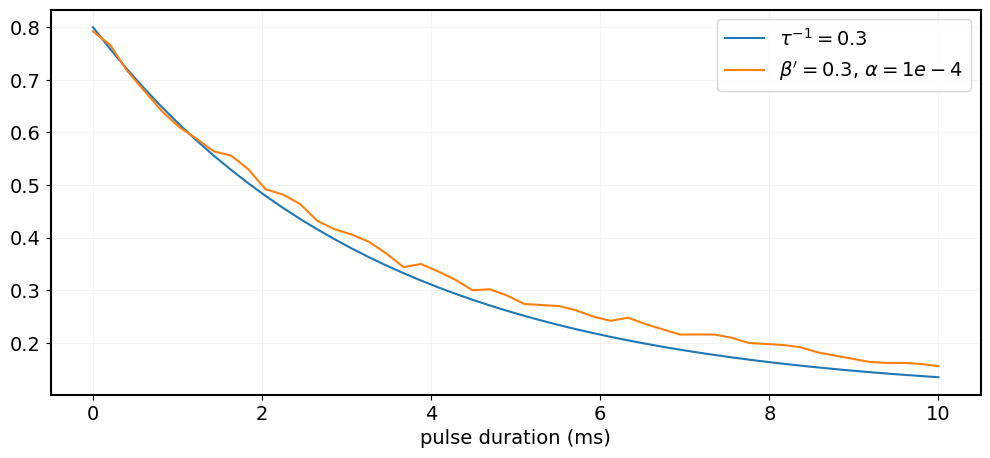

In [232]:
fig, ax = plt.subplots(figsize=(12, 5))
ts = np.linspace(1e-3, 10, 50)
beta_prime = 0.3
ax.plot(ts, .1+0.7*np.exp(-ts*beta_prime),label = r'$\tau^{-1}=$'+str(beta_prime))
plt.plot(ts, two_body_loss_sim(ts,beta_prime,1e-6,start = .8, asymp=0.1), label=r'$\beta^{\prime} =$'+str(beta_prime)+', $ \\alpha = 1e-4$')
# plt.plot(ts, betaPrimeFit(ts,beta_prime,5e-4,start = .8, asymp=0.3), label=r'$\beta^{\prime}  = 1.8, \alpha = 5\times 10^{-3}$')
# plt.plot(ts, betaPrimeFit(ts,beta_prime,4e-3), label=r'$\beta^{\prime}  = 1.8, \alpha = 5\times 10^{-2}$')
# plt.ylabel('two-atom survival')
plt.xlabel('pulse duration (ms)')
plt.legend();
# plt.ylim(0,1)

In [42]:
### beta prime evaluated multiple times at each time step for each trajectory

def betaPrimeFit2(ts, beta_prime,alpha, U=1e-3,T0=30e-6 ):
    trajectories = 700
    n_point_per_time = 50
    fin_surv=[]
    
    for t in ts:
        times_x= np.linspace(0, t, n_point_per_time)
        dt_step = times_x[1] - times_x[0]
        surv_sum_traj = np.zeros(len(times_x))

        for j in np.arange(trajectories):
            N0 = 2  # Initial number of atoms
            surv_dts = np.zeros(len(times_x))
            surv_dts[0] = N0

            for i in range(len(times_x)):
                if i == 0:
                    num_atoms_at_this_step = surv_dts[0]
                else:
                    num_atoms_at_this_step = surv_dts[i - 1]

                P_two_body_loss = dq_two_body(beta_prime, num_atoms_at_this_step, dt_step)
                P_one_body_loss = dq_one_body(gamma(dt_step,U,T0,alpha), num_atoms_at_this_step, dt_step)

                prob_no_loss = (1 - P_one_body_loss) * (1 - P_two_body_loss)
                prob_one_loss = P_one_body_loss * (1 - P_two_body_loss)
                prob_two_loss = (1 - P_one_body_loss) * P_two_body_loss

                prob_dict = {'no_loss': prob_no_loss, 'one_loss': prob_one_loss, 'two_loss': prob_two_loss}

                # Define a probability order
                ordered_dict = sorted(prob_dict.items(), key=lambda x: x[1])

                # Choose which decay channel will happen using Monte Carlo
                p_rand = random.random()
                p_rand_20_21 = random.random()
                if p_rand < ordered_dict[0][1]: # if random number is less than the smallest loss probability of the three loss options
                    if surv_dts[i] == 2 and p_rand_20_21 < 0.2:
                        surv_dts[i] -= 1
                    else: 
                        surv_dts[i] = num_atoms_at_this_step - number_of_lost_atoms(ordered_dict[0][0]) # then the # of remaining atoms at this time step is determined by key name of smallest survival probability
                    # print('key, atoms lost=',ordered_dict[0][0],',',number_of_lost_atoms(ordered_dict[0][0]))
                    # print('remaining atoms at this time=',surv_dts[i])
                elif ordered_dict[0][1] < p_rand < ordered_dict[1][1]: # if random number is between smallest loss and second smallest loss probability 
                    if surv_dts[i] == 2 and p_rand_20_21 < 0.2:
                        surv_dts[i] -= 1  
                    else:
                        surv_dts[i] = num_atoms_at_this_step - number_of_lost_atoms(ordered_dict[1][0])
                    # print('key, atoms lost=',ordered_dict[1][0],',',number_of_lost_atoms(ordered_dict[1][0]))
                    # print('remaining atoms at this time=',surv_dts[i])
                else: # if random number is greater than both of the 2 smallest probabilities
                    if surv_dts[i] == 2 and p_rand_20_21 < 0.2:
                        surv_dts[i] -= 1                
                    else:
                        surv_dts[i] = num_atoms_at_this_step - number_of_lost_atoms(ordered_dict[2][0]) # the # of atoms remaining = inital atom # - value for the key with the largest probability
                    # print('key, atoms lost=',ordered_dict[2][0],',',number_of_lost_atoms(ordered_dict[2][0]))
                    # print('remaining atoms at this time=',surv_dts[i])

            # apply a 2->1 collision (80% probability 2-1) and image (20% prob of 2-1)
            for k in range(len(surv_dts)):
                p_rand_LAC_21 = random.random()
                p_rand_image_21 = random.random()
                if surv_dts[k] == 2 and p_rand_LAC_21 <= .85: #2-1 pulse
                    surv_dts[k] -= 1   
                if surv_dts[k] == 2 and p_rand_image_21 <= 0.1: #imaging pulse
                    surv_dts[k] -= 1            
                if surv_dts[k] == 2:         
                    surv_dts[k] = 0

            surv_sum_traj += surv_dts
        surv_average = surv_sum_traj / trajectories
        fin_surv.append(surv_average[-1])
    return fin_surv 

## Brute force fitting

In [82]:
# Used for the fitting:
def residual(betaPrime,x_pts, data, uncertainties,alpha):
    model = betaPrimeFit(x_pts, betaPrime,alpha,U=1e-3,T0=30e-6)
    return (((model-data)/uncertainties)**2).sum()

In [83]:
def get_smoothed_residual_f(x, residual):
    _sg = savgol_filter(residual, window_length=7, polyorder=3) # window size 51, polynomial order 3
    _f = interp1d(x, _sg, kind='cubic')
    return _f

In [84]:
def get_minimum(_f, x0):
    _xmin,_fmin, _,_,warnflag = fmin(_f, 
        x0, disp=False,full_output=True)
    if warnflag:
        print(f"{warnflag:d} ---  1 : Maximum number of function evaluations made. 2 : Maximum number of iterations reached.")
    return _xmin, _fmin

In [85]:
def get_root(_f, y0, xbound0, xbound1):
    _f_offset = lambda x : (_f(x) - y0)
    root = brentq(_f_offset, xbound0, xbound1, disp=False)
    return root
    # return get_minimum(_f=_f_offset, x0=x0)

In [86]:
def P_survival_lin_heating(t, alpha,U0,T0):
    tau = 4.5
    P_vacuum = np.exp(-t/tau)
    P_heat = 1 - np.exp(-U0/(T0 + alpha*t)) * (1 + U0/(T0 + alpha*t) + U0**2/(2*(T0 + alpha*t)**2))
    return P_vacuum * P_heat



## beta prime fit

In [238]:
def residual_alpha(alpha,x_pts, data, uncertainties):
    model = P_survival_lin_heating(x_pts, betaPrime,alpha,U=1e-3,T0=30e-6)
    return (((model-data)/uncertainties)**2).sum()

def residual_beta(betaPrime,x_pts, data, uncertainties,alpha):
    model = two_body_loss_sim(x_pts, betaPrime,alpha,U=1e-3,T0=30e-6)
    return (((model-data)/uncertainties)**2).sum()
                   
def get_smoothed_residual_f(x, residual):
    _sg = savgol_filter(residual, window_length=7, polyorder=3) # window size 51, polynomial order 3
    _f = interp1d(x, _sg, kind='cubic')
    return _f
                   
def get_minimum(_f, x0):
    _xmin,_fmin, _,_,warnflag = fmin(_f, 
        x0, disp=False,full_output=True)
    if warnflag:
        print(f"{warnflag:d} ---  1 : Maximum number of function evaluations made. 2 : Maximum number of iterations reached.")
    return _xmin, _fmin
                   
def get_root(_f, y0, xbound0, xbound1):
    _f_offset = lambda x : (_f(x) - y0)
    root = brentq(_f_offset, xbound0, xbound1, disp=False)
    return root

def beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1):
    out, fout, grid, fgrid = optimize.brute(residual_beta,(slice((decay_constant-range_lim), (decay_constant+range_lim), range_step),),
    args=(x_fit, y_fit, uncertainties,alpha),full_output=True,finish='leastsq')
    f_loss_smooth = get_smoothed_residual_f(grid, fgrid)
    grid_min, loss_min = get_minimum(f_loss_smooth, out)
    grid_min_err_low = get_root(f_loss_smooth, y0=loss_min*1.1, xbound0=grid.min(), xbound1=grid_min)
    grid_min_err_high = get_root(f_loss_smooth, y0=loss_min*1.1, xbound0=grid_min, xbound1=grid.max())
    low_err=grid_min[0]-grid_min_err_low # those turns out to be array with only one element
    high_err=grid_min_err_high-grid_min[0]
    popt_min=grid_min[0]
    loss_mins=loss_min
    return popt_min,high_err,low_err

### test data

In [87]:
def decay_exponential(x, A, k, C):
    return A * np.exp(-k * x) + C


In [92]:
x_data = np.linspace(0,3e-3,30)
y_data = .2+.6*decay_exponential(x_data,1, 1.8e3,0)
errs = [0.1 for _ in range(30)]
alpha = 3e-4
mean_noise = 0.0  # Mean of the noise
std_dev_noise = 0.02  # Standard deviation of the noise

# Generate random noise
noise = np.random.normal(mean_noise, std_dev_noise, len(x_data))

# Add noise to the data
y_data_with_noise = y_data + noise

surv = y_data
surv_unc = errs
x_axis = x_data
rranges = (slice(1e3, 3e3, 0.1e3),)

out, fout, grid, fgrid = optimize.brute(residual,rranges,
    args=(x_axis, surv, surv_unc,alpha),full_output=True,finish='leastsq')

Text(0.5, 1.0, 'test data')

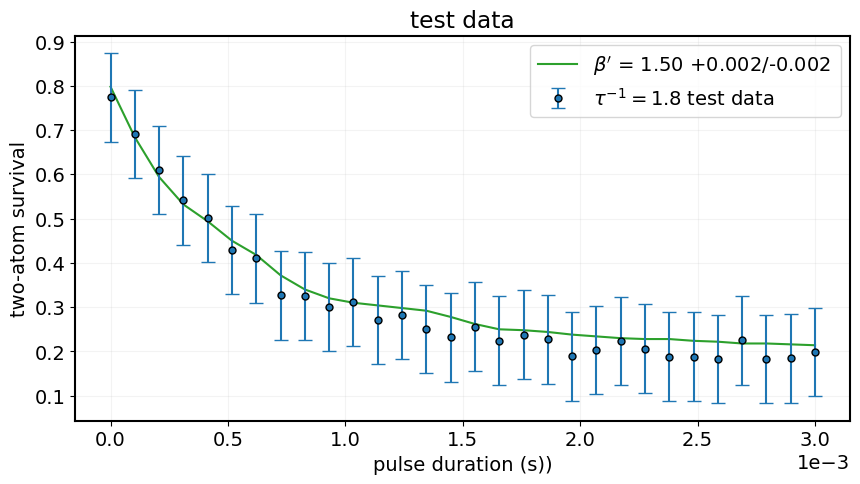

In [93]:
f_loss_smooth = get_smoothed_residual_f(grid, fgrid)
grid_min, loss_min = get_minimum(f_loss_smooth, out)
grid_min_err_low = get_root(f_loss_smooth, y0=loss_min*1.1, xbound0=grid.min(), xbound1=grid_min)
grid_min_err_high = get_root(f_loss_smooth, y0=loss_min*1.1, xbound0=grid_min, xbound1=grid.max())
low_err=grid_min[0]-grid_min_err_low # those turns out to be array with only one element
high_err=grid_min_err_high-grid_min[0]
popt_min=grid_min[0]
loss_mins=loss_min
# print(grid_min, grid_min_err_low, grid_min_err_high, loss_min)
fig,ax = plt.subplots(1, figsize=[10,5])

times= np.linspace(0, 3e-3, 50)
ax.plot(x_data, betaPrimeFit(x_data,popt_min,1e-4), 
        label= f"$\\beta^{{\\prime}}$ = {popt_min*1e-3:.2f} +{high_err*1e-3:.3f}/-{low_err*1e-3:.3f} ",color='tab:green')
ax.errorbar(x_data,y_data_with_noise, yerr=errs,ls='none',ecolor=color2,marker = 'o',markersize = 5,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = r'$\tau^{-1}=1.8$ test data')
# ax.plot(x_data, y_data,color=color2,label=r'$\tau^{-1}=1.8$')

# alpha, decay_constant = ah.beta_fit_guess(x_data,load_one_y,load_two_y,load_one_err, 1e-3, 30e-6,alpha_guess=125e-6)
ax.legend()
ax.set_xlabel(r"pulse duration (s))")
ax.set_ylabel(r"two-atom survival")
ax.set_title("test data")

### real data

In [204]:
reload(lac)

<module 'Analysis_Python_Files.CollisionalAnalysis' from '/Users/stevenpampel/Documents/B232_Data_Analysis/Data Analysis Notebook/../Analysis_Python_Files/CollisionalAnalysis.py'>

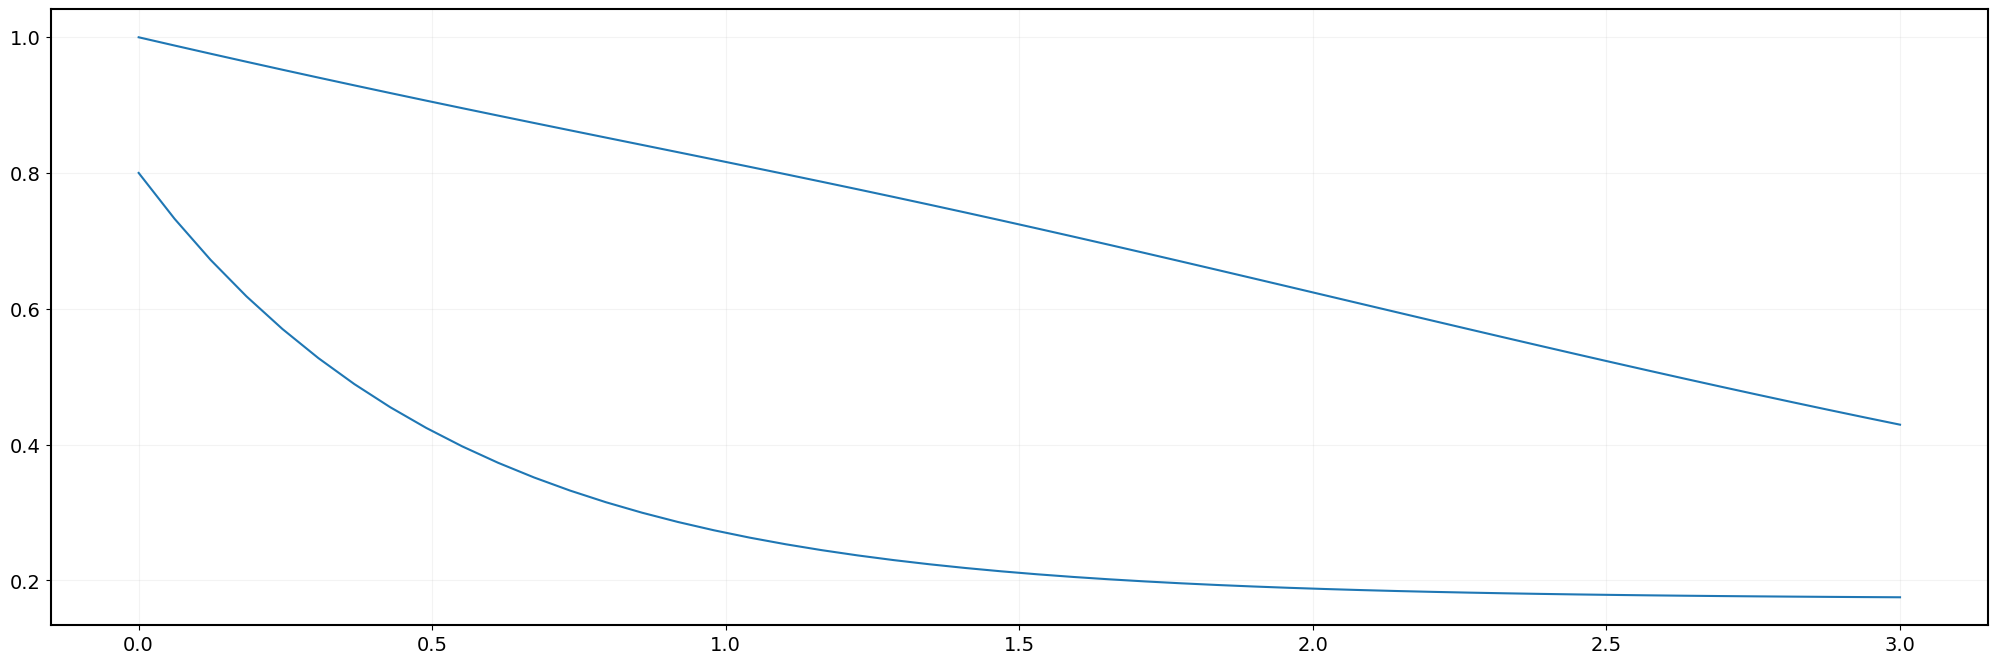

In [202]:
reloadMyModules(20,'november')
fileId = 32 
threshold = 75
x_data,load_one_y,load_one_err,load_two_y,load_two_err, unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_one_y[0] = .99
load_two_y[0] = 0.8
load_two_y[3] = 0.2

num_points = 50 # number of points for exponential fit of data
surv_unc = np.mean([np.mean([up,lo]) for (up,lo) in zip(load_two_err[0],load_two_err[1])])
uncertainties = [surv_unc]*num_points
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y,U0 = 1e-3,T0 = 30e-6,alpha_guess=125e-6,num_points = num_points)
_,x_fit,y_fit,unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)
rranges = (slice((decay_constant-2), (decay_constant+3), 0.1),)
out, fout, grid, fgrid = optimize.brute(residual,rranges,
    args=(x_fit, y_fit, uncertainties,alpha),full_output=True,finish='leastsq')

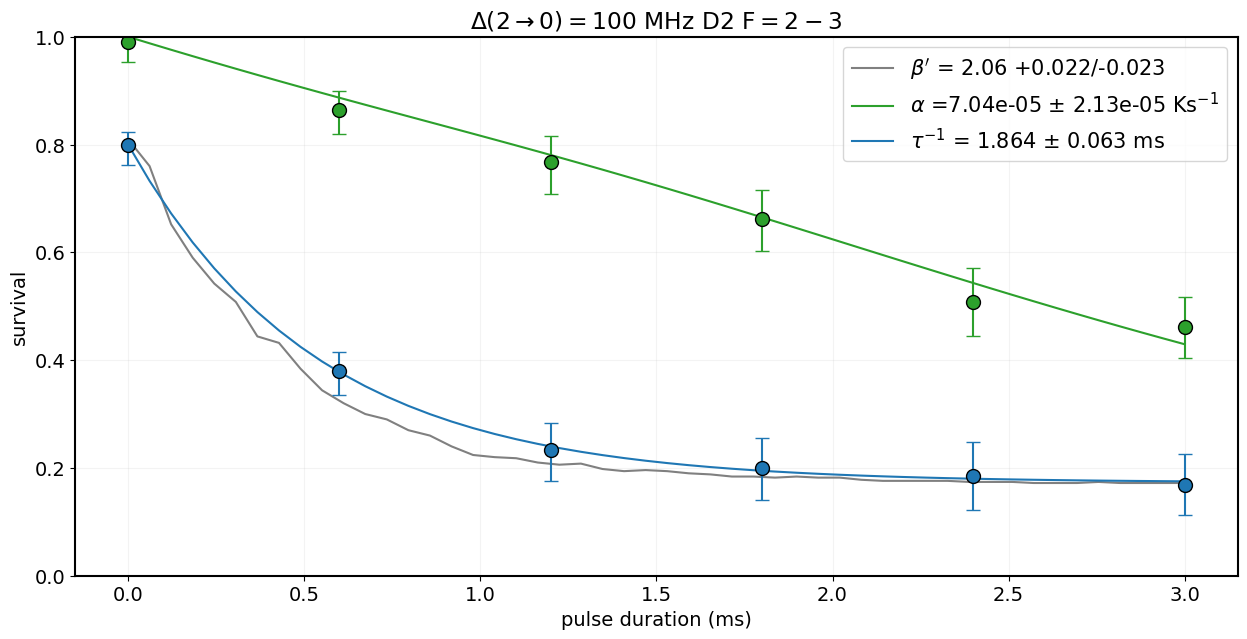

In [205]:
f_loss_smooth = get_smoothed_residual_f(grid, fgrid)
grid_min, loss_min = get_minimum(f_loss_smooth, out)
grid_min_err_low = get_root(f_loss_smooth, y0=loss_min*1.1, xbound0=grid.min(), xbound1=grid_min)
grid_min_err_high = get_root(f_loss_smooth, y0=loss_min*1.1, xbound0=grid_min, xbound1=grid.max())
low_err=grid_min[0]-grid_min_err_low # array with only one element
high_err=grid_min_err_high-grid_min[0]
popt_min=grid_min[0]
loss_mins=loss_min
# print(grid_min, grid_min_err_low, grid_min_err_high, loss_min)
fig,ax = plt.subplots(1, figsize=[15,7])

times= np.linspace(0, 3e-3, 50)
ax.plot(x_fit, betaPrimeFit(x_fit,popt_min,alpha), 
        label= f"$\\beta^{{\\prime}}$ = {popt_min:.2f} +{high_err:.3f}/-{low_err:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y,U0 = 1e-3,T0 = 30e-6,alpha_guess=125e-6,num_points = num_points)

ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta(2 \rightarrow 0) = 100 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $');


In [258]:
reload(lac)

<module 'Analysis_Python_Files.CollisionalAnalysis' from '/Users/stevenpampel/Documents/B232_Data_Analysis/Data Analysis Notebook/../Analysis_Python_Files/CollisionalAnalysis.py'>

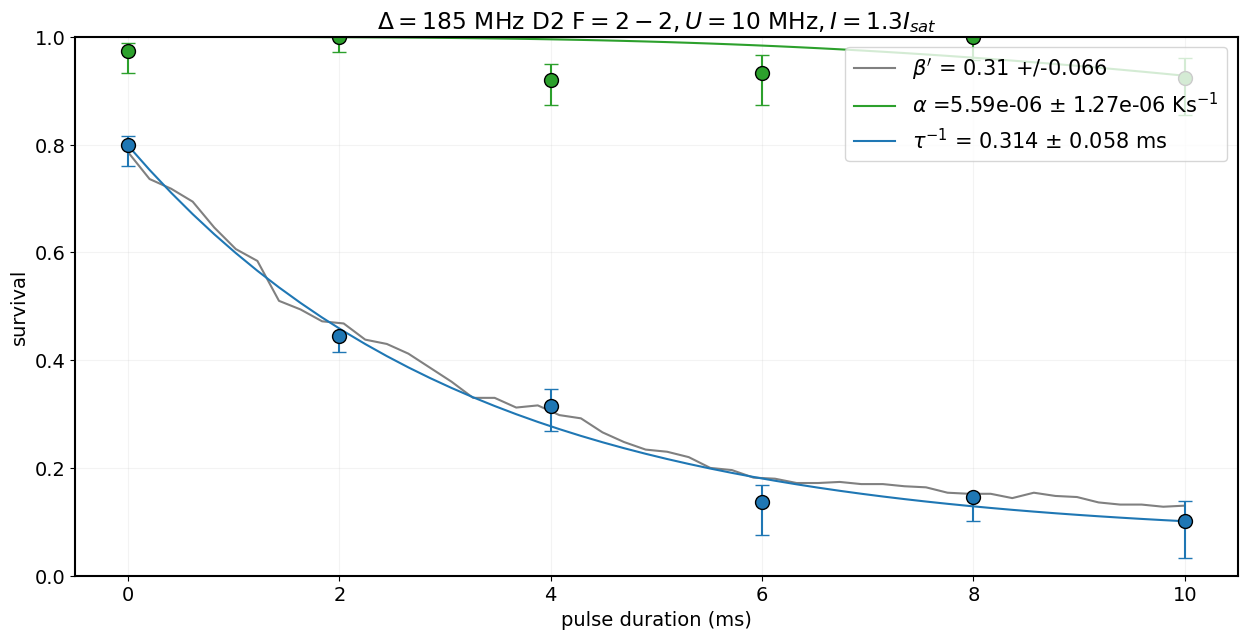

In [259]:
U0 = .5e-3
T0 = 30e-6
reloadMyModules(18,'December')
fileId = 4

threshold = 60
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])
total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,decay_constant,alpha,start = .8, asymp=0.1), 
        label= f"$\\beta^{{\\prime}}$ = {decay_constant:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 185 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');
